In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
 click <a href="javascript:code_toggle()">here</a> to hide the raw code.''')

## Initial conditions 
<img style="float: right;",src="write_cs2_000068.png" width=250>


* r goes from -0.5 to 0.5; z goes from 0 to 1; resolution = 1024^2

* $\nu = \kappa = \eta = 10^{-6}$
* $\Omega = 0.5$, $q = 1.5$
* $\delta r = 0.02$
* $\gamma = 5/3$

initial state:
* $\rho = 1$
* $T = 10$
* $u_{\phi} = -q\Omega r$
* $B_z = (0.01/2)$ ${\tanh[ (r+0.1)/\delta r ] - \tanh[ (r-0.1)/\delta_r ]}$
* $u_r = 0.1 [\sin(2\pi z)-\sin(4\pi z)] \exp(-r^2/0.1^2)$

BC's:
* periodic in z
at the r boundaries:
* $u_r = 0$
* perturbations to $u_{\phi}$ has zero derivative (i.e., $d u_{\phi}/dr = -q\Omega$ )
* d u_z/dr = 0
* $B_r = 0$
* $d T/dr = 0$

Run to $t\sim 20$.



In [21]:
%matplotlib inline
#%pylab inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
#import athena4_read as ath
import athena_read as ath
from shwave import cn4, cn5
import time
from csheet3d import show_contour
%load_ext autoreload
%autoreload 2
#%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


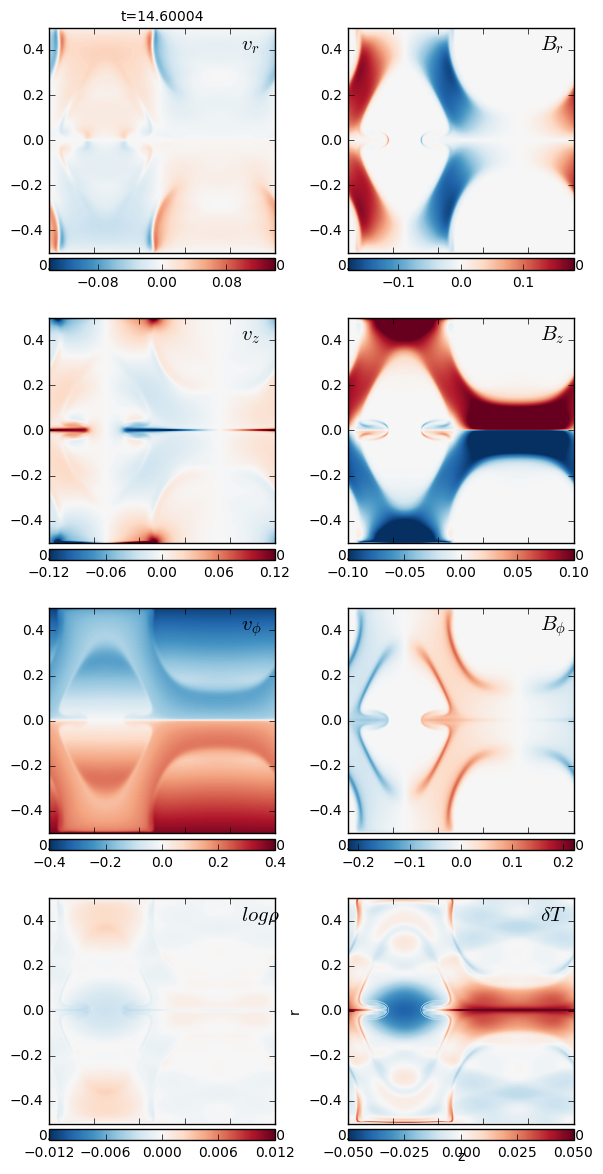

In [22]:


import mri2d_test as m2d
from my_colors import get_jhcolors

fdir = '/tigress/jiming/athena/bin/for_daniel/data/two_tube.shbox_nu=1e-5/single/' #512x512_nu=1e-5'
cm=get_jhcolors()
for i in np.arange(146,147):
  fname=fdir+'/mri2d.block0.out2.'+str(i).zfill(5)+'.vtk'
  time,x,y,z,rho,T,bx,by,bz,vx,vy,vz = m2d.read_all_vtk(fname)
  m2d.plot_all_hdf5(time,x,y,z,rho,T,bx,by,bz,vx,vy,vz)#,cmap=cm)
  #plt.savefig(fdir+'/mri2d_t='+str(i).zfill(4)+'.png', format='png', dpi=300)

time =  28.3000414204


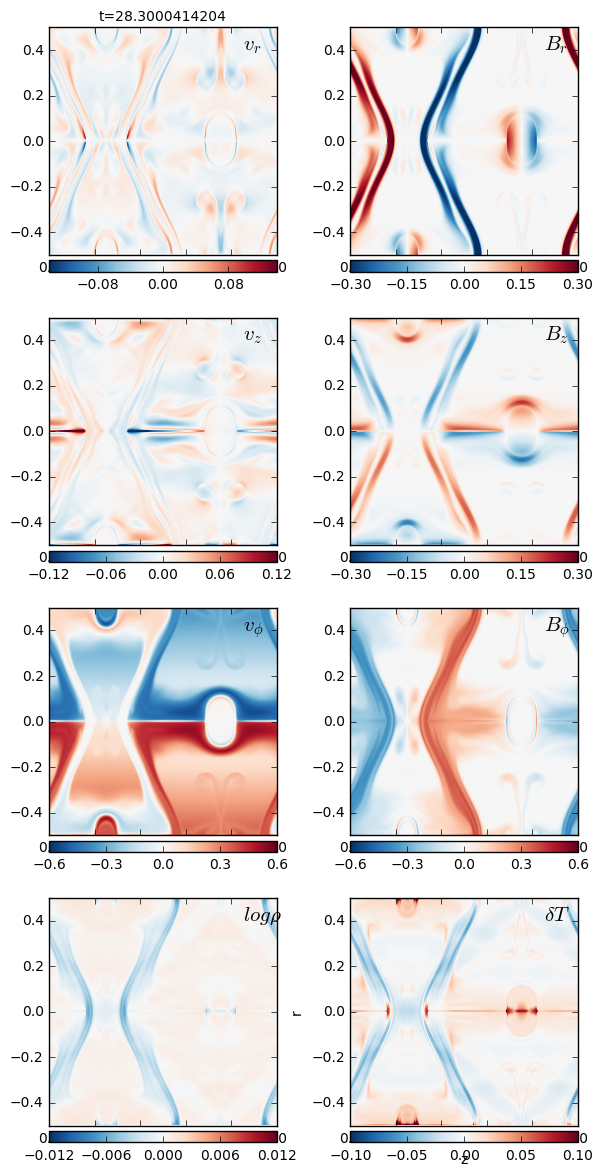

In [38]:
import mri2d_test as m2d
from my_colors import get_jhcolors

fdir = '/tigress/jiming/athena/bin/for_daniel/data/two_tube.shbox_nu=1e-5.hires' #512x512_nu=1e-5'
cm=get_jhcolors()
for i in np.arange(283,284):
  fname=fdir+'/mri2d.out2.'+str(i).zfill(5)+'.athdf'
  time,x,y,z,rho,T,bx,by,bz,vx,vy,vz = m2d.read_all_hdf5(fname)
  m2d.plot_all_hdf5(time,x,y,z,rho,T,bx,by,bz,vx,vy,vz)
  #plt.savefig(fdir+'/mri2d_t='+str(i).zfill(4)+'.png', format='png', dpi=300)

time =  19.7500295991


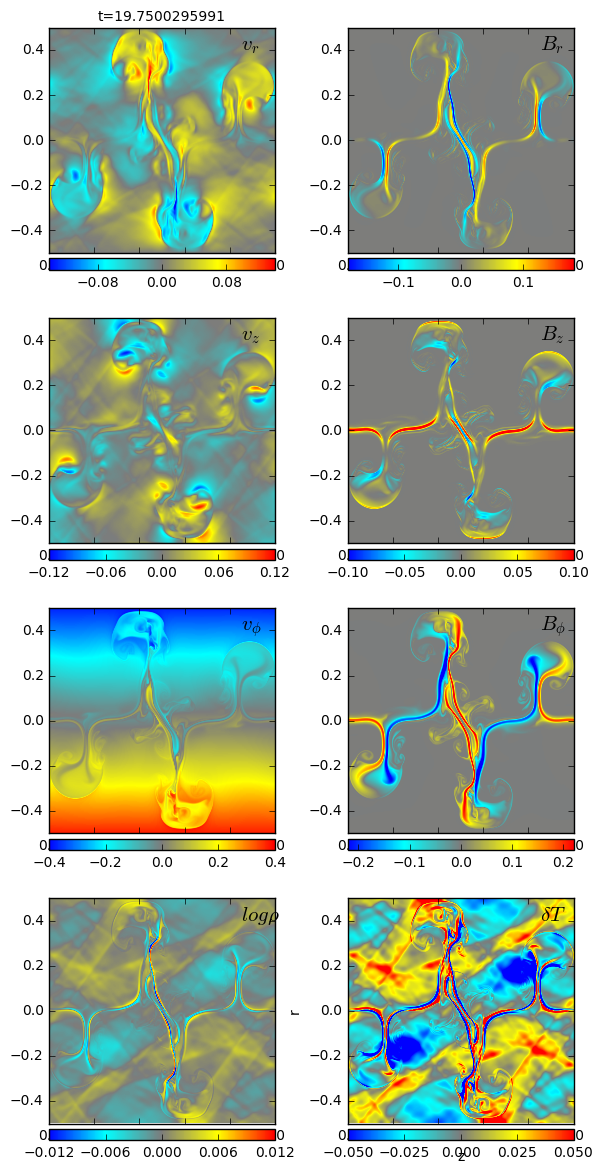

In [140]:
import mri2d_test as m2d
from my_colors import get_jhcolors

fdir = '/tigress/jiming/athena/bin/for_daniel/data/1024x1024_nu=1e-6' #512x512_nu=1e-5'
cm=get_jhcolors()
for i in np.arange(79,80):
  fname=fdir+'/mri2d.out2.'+str(i).zfill(5)+'.athdf'
  time,x,y,z,rho,T,bx,by,bz,vx,vy,vz = m2d.read_all_hdf5(fname)
  m2d.plot_all_hdf5(time,x,y,z,rho,T,bx,by,bz,vx,vy,vz,cmap=cm)
  #plt.savefig(fdir+'/mri2d_t='+str(i).zfill(4)+'.png', format='png', dpi=300)

## plot the $A_{\phi}$ contour lines

time =  21.2500077935


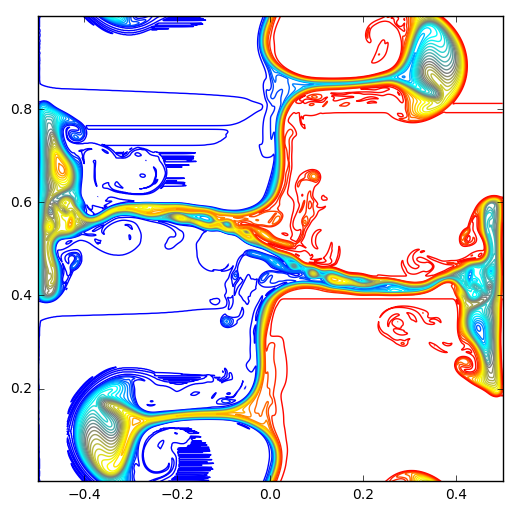

In [150]:
from mri2d_test import plot_aphi_contour

#load one snapshot
i=85 #70
fdir = '/tigress/jiming/athena/bin/for_daniel/data/ideal' #1024x1024_nu=1e-6' #512x512_nu=1e-5'
fname=fdir+'/mri2d.out2.'+str(i).zfill(5)+'.athdf'
time,x,y,z,rho,T,bx,by,bz,vx,vy,vz = m2d.read_all_hdf5(fname)

# call plot_aphi_contour to generate contours and save to png
plot_aphi_contour(by,x,y,nlev=40,t=time,vmin=5e-5,vmax=2e-3,cmap=cm) #,to_png=True,pname=fdir+'/mri2d.aphi.'+str(i).zfill(5)+'.png')


## plot $\vec{J}$ 

time =  6.28331563314


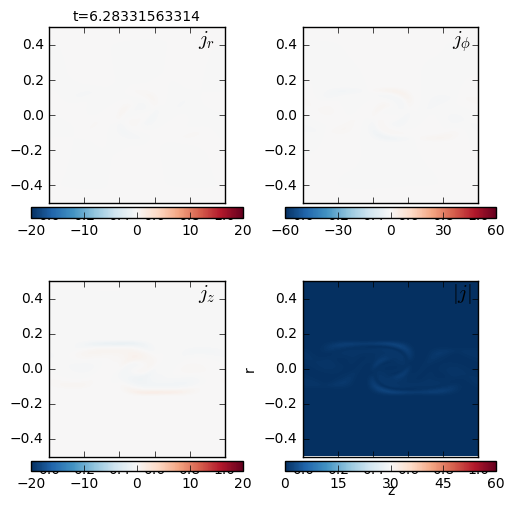

In [195]:
import mri2d_test as m2d

#load one snapshot
i=85
fdir = '/tigress/jiming/athena/bin/for_daniel/data/ideal' #1024x1024_nu=1e-6' #512x512_nu=1e-5'

i=10
fdir = '/tigress/jiming/athena/bin/for_daniel/data/512x512_nu=1e-5'
fname=fdir+'/mri2d.out2.'+str(i).zfill(5)+'.athdf'
time,x,y,z,rho,T,bx,by,bz,vx,vy,vz = m2d.read_all_hdf5(fname)
m2d.plot_jcurrent(time,x,y,bx,by,bz,ext1=[-20,20],ext2=[-60,60],ext3=[-20,20],ext4=[0,60],to_png=False,pname=fdir+'/mri2d.jcurr.'+str(i).zfill(5)+'.png')
# dx = x[1]-x[0]
# dz = y[1]-y[0]
# jx,jy,jz = m2d.curl2d(bx,by,bz,dx,dz)
# plt.imshow(jy)
# plt.colorbar()

In [186]:
# test the batch script in notebook
from mri2d_test import batch_png

ts,te,tstride = 30,33,1
fdir = '/tigress/jiming/athena/bin/for_daniel/data/512x512_nu=1e-5'
batch_png(fdir,ts,te,tstride)

time =  18.8496243966
time =  19.4779205864
time =  20.0
time =  20.0


In [23]:
import mri2d_test as m2d

fdir = '/tigress/jiming/athena/bin/for_daniel/data/two_tube_nu=1e-5.hires/wrongIC'

for i in np.arange(0,301):
  fname=fdir+'/mri2d.out2.'+str(i).zfill(5)+'.athdf'
  time,x,y,z,rho,T,bx,by,bz,vx,vy,vz = m2d.read_all_hdf5(fname)
  #m2d.plot_all_hdf5(time,x,y,z,rho,T,bx,by,bz,vx,vy,vz,cmap=cm)
  m2d.plot_one_panel(time,x,y,z,bz,label=r'$B_{\phi}$',to_png=True,pname=fdir+'/bphi.'+str(i).zfill(5)+'.png')
  #plt.savefig(fdir+'/mri2d_t='+str(i).zfill(4)+'.png', format='png', dpi=300)

time =  0.0


KeyboardInterrupt: 

time =  25.0000094211


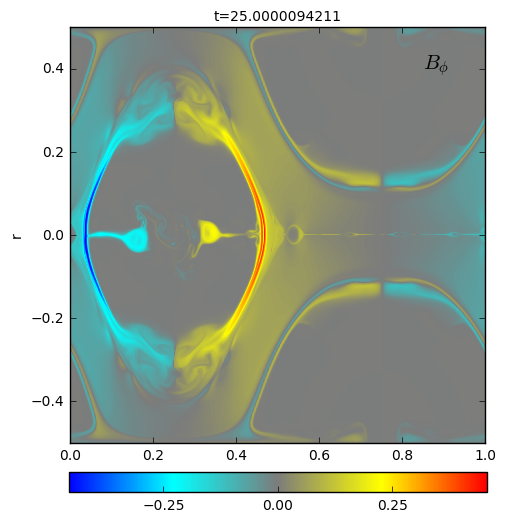

In [91]:
import mri2d_test as m2d
from my_colors import get_jhcolors

cm=get_jhcolors()

i=250
fdir = '/tigress/jiming/athena/bin/for_daniel/data/two_tube.smr' #.hires/' #.hires' #/wrongIC'
fname=fdir+'/mri2d.out2.'+str(i).zfill(5)+'.athdf'
time,x,y,z,rho,T,bx,by,bz,vx,vy,vz = m2d.read_all_hdf5(fname,level=2,subsample=True)
#m2d.plot_all_hdf5(time,x,y,z,rho,T,bx,by,bz,vx,vy,vz)
m2d.plot_one_panel(time,x,y,z,bz,label=r'$B_{\phi}$',cmap=cm) #,to_png=True,pname=fdir+'/bphi.'+str(i).zfill(5)+'.png')
  #plt.savefig(fdir+'/mri2d_t='+str(i).zfill(4)+'.png', format='png', dpi=300)

time =  20.0000427931


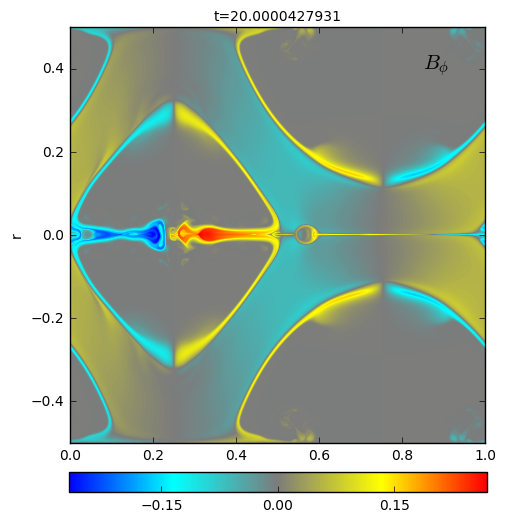

In [88]:
import mri2d_test as m2d
from my_colors import get_jhcolors

cm=get_jhcolors()

i=200
fdir = '/tigress/jiming/athena/bin/for_daniel/data/two_tube.hires' #.hires' #_nu=1e-5/BK/' #.hires' #/wrongIC'
fname=fdir+'/mri2d.out2.'+str(i).zfill(5)+'.athdf'
time,x,y,z,rho,T,bx,by,bz,vx,vy,vz = m2d.read_all_hdf5(fname)
#m2d.plot_all_hdf5(time,x,y,z,rho,T,bx,by,bz,vx,vy,vz)
m2d.plot_one_panel(time,x,y,z,bz,label=r'$B_{\phi}$',cmap=cm) #,to_png=True,pname=fdir+'/bphi.'+str(i).zfill(5)+'.png')
  #plt.savefig(fdir+'/mri2d_t='+str(i).zfill(4)+'.png', format='png', dpi=300)